# Descriptive Analytics

## Data Overview

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from h3 import h3 
from shapely.geometry import shape
from shapely.geometry import Point

In [3]:
df=pd.read_csv('taxi_2017_complete_preprocessed.csv', parse_dates=["start_time","end_time"])
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21737166 entries, 0 to 21737165
Data columns (total 30 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   start_time                 datetime64[ns]
 1   end_time                   datetime64[ns]
 2   trip_seconds               float64       
 3   trip_miles                 float64       
 4   start_census               float64       
 5   end_census                 float64       
 6   start_community            int64         
 7   end_community              int64         
 8   fare                       float64       
 9   tips                       float64       
 10  tolls                      float64       
 11  extras                     float64       
 12  trip_total                 float64       
 13  payment_type               object        
 14  company                    object        
 15  start_latitude             float64       
 16  start_longitude            float64

In [5]:
df.head(3)

,start_time,end_time,trip_seconds,trip_miles,start_census,end_census,start_community,end_community,fare,tips,...,Dropoff Centroid Location,new_TaxiID,dur_min,date,weekday,avg_temp,precip,hour,day,month
0,2017-01-01,2017-01-01 00:30:00,1800.0,0.0,1.703108e+10,1.703108e+10,8,8,13.25,4.25,...,POINT (-87.6262149064 41.8925077809),2751,30.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1
1,2017-01-01,2017-01-01 00:00:00,660.0,2.7,NaN,NaN,2,3,10.00,2.00,...,POINT (-87.6558787862 41.96581197),5058,11.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1
2,2017-01-01,2017-01-01 00:15:00,120.0,0.5,NaN,NaN,16,16,4.50,0.00,...,POINT (-87.7234523905 41.9535821253),5047,2.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1


In [6]:
df.tail(3)

,start_time,end_time,trip_seconds,trip_miles,start_census,end_census,start_community,end_community,fare,tips,...,Dropoff Centroid Location,new_TaxiID,dur_min,date,weekday,avg_temp,precip,hour,day,month
21737163,2017-12-31 23:45:00,2017-12-31 23:45:00,381.0,1.52,1.703124e+10,1.703184e+10,24,8,7.25,0.00,...,POINT (-87.6499072264 41.9049353016),746,6.35,2017-12-31 00:00:00,6,-12.8,0.0,23,31,12
21737164,2017-12-31 23:45:00,2018-01-01 00:00:00,1116.0,5.50,NaN,NaN,8,6,17.25,3.85,...,POINT (-87.6559981815 41.9442266014),973,18.60,2017-12-31 00:00:00,6,-12.8,0.0,23,31,12
21737165,2017-12-31 23:45:00,2018-01-01 00:00:00,926.0,0.20,1.703108e+10,1.703108e+10,8,8,8.25,0.00,...,POINT (-87.6288741572 41.8920726347),5186,15.43,2017-12-31 00:00:00,6,-12.8,0.0,23,31,12


In [7]:
df.count()

start_time                   21737166
end_time                     21737166
trip_seconds                 21737166
trip_miles                   21737166
start_census                 16500982
end_census                   16500982
start_community              21737166
end_community                21737166
fare                         21737166
tips                         21737166
tolls                        21737166
extras                       21737166
trip_total                   21737166
payment_type                 21737166
company                      21737166
start_latitude               21737166
start_longitude              21737166
Pickup Centroid Location     21737166
end_latitude                 21737166
end_longitude                21737166
Dropoff Centroid Location    21737166
new_TaxiID                   21737166
dur_min                      21737166
date                         21737166
weekday                      21737166
avg_temp                     21737166
precip      

## Temporal Demand Patterns

### Usage During a Day

In [8]:
# number of trips for every hour on a day
trips_day = np.zeros(24)
for i in range(24):
    trips_day[i] = len(df[df['hour']==i])
    
time = pd.DataFrame({'Time_Period': range(24), 'Trips': trips_day})
time.head()

,Time_Period,Trips
0,0,627431.0
1,1,516845.0
2,2,411886.0
3,3,310360.0
4,4,224330.0


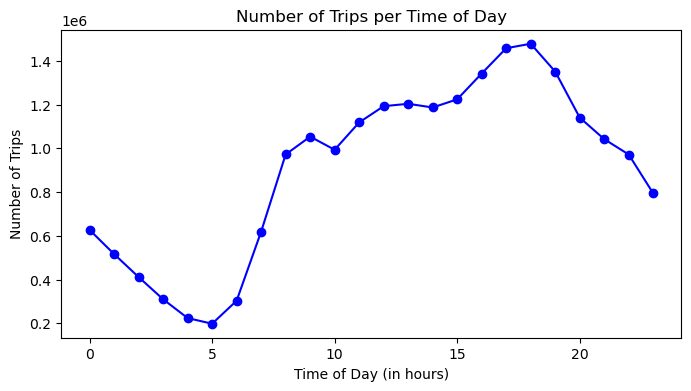

In [9]:
# hourly demand
plt.figure(figsize=(8,4))
plt.plot(time['Time_Period'],time['Trips'],'o-', color='blue')
plt.xlabel("Time of Day (in hours)")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Time of Day")
#plt.savefig("daily demand.png")
plt.show()

### Usage during a Week

In [10]:
weekdays =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_week=np.zeros(7)
for i in range(7):
    trips_week[i] = len(df[df["weekday"]==i])
    
weekdaysize = pd.DataFrame({'Weekday': weekdays, 'Trips': trips_week})
weekdaysize

,Weekday,Trips
0,Monday,2774671.0
1,Tuesday,3124166.0
2,Wednesday,3362848.0
3,Thursday,3542624.0
4,Friday,3610376.0
5,Saturday,2915637.0
6,Sunday,2406844.0


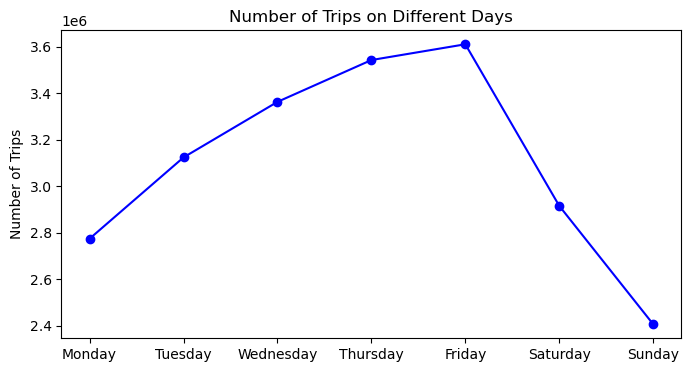

In [11]:
# weekly demand
plt.figure(figsize=(8,4))
plt.plot(weekdaysize["Weekday"], weekdaysize["Trips"],'o-', color='blue')
plt.ylabel("Number of Trips")
plt.title("Number of Trips on Different Days")
#plt.savefig("weekly demand.png")
plt.show()

In [12]:
# Warum so wenige Sonntag?

### Usage during a Year

In [13]:
months=["January","February","March","April","May","June","July","August","September","Oktober","November","December"]

In [14]:
trips_month = np.zeros(12)
for i in range(12):
    trips_month[i]= len(df[df["month"]==i+1])

year= pd.DataFrame({'Months':months, 'Trips':trips_month})
year

,Months,Trips
0,January,1693112.0
1,February,1647777.0
2,March,2054348.0
3,April,1912549.0
4,May,2015806.0
5,June,2027055.0
6,July,1792559.0
7,August,1816699.0
8,September,1698700.0
9,Oktober,1870099.0


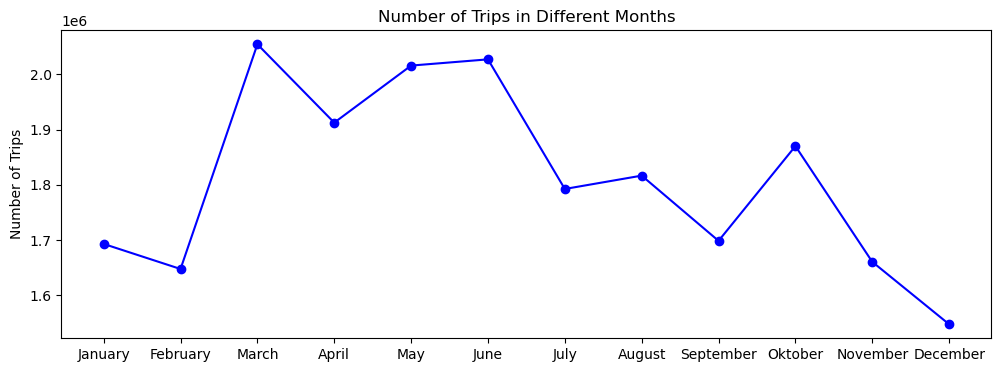

In [15]:
# yearly demand
plt.figure(figsize=(12,4))
plt.plot(year["Months"], year["Trips"],'o-', color='blue')
plt.ylabel("Number of Trips")
plt.title("Number of Trips in Different Months")
#plt.savefig("yearly demand.png")
plt.show()

In [16]:
# Seasonal Comparison??

## Spatial Analysis

### Load Data and Data Overview

In [17]:
H3_HEXAGON_RESOLUTION = 8

In [18]:
#df["h3_hex_id_start"] = df.apply(lambda row: h3.geo_to_h3(row["start_latitude"], row["start_longitude"], H3_HEXAGON_RESOLUTION) if (row['start_latitude'] and row['start_longitude']) else 0, axis=1)
# df["h3_hex_id_end"] = df.apply(lambda row: h3.geo_to_h3(row["end_latitude"], row["end_longitude"], H3_HEXAGON_RESOLUTION) if (row['end_latitude'] and row['end_longitude']) else 0, axis=1)

#### Taxi Trip Dataset

In [19]:
# df['start_time'] = pd.to_datetime(df['start_time'])

In [20]:
# Convert taxi_trips DataFrame to a GeoDataFrame
taxi_trips = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.start_longitude, df.start_latitude)
)
taxi_trips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21737166 entries, 0 to 21737165
Data columns (total 31 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   start_time                 datetime64[ns]
 1   end_time                   datetime64[ns]
 2   trip_seconds               float64       
 3   trip_miles                 float64       
 4   start_census               float64       
 5   end_census                 float64       
 6   start_community            int64         
 7   end_community              int64         
 8   fare                       float64       
 9   tips                       float64       
 10  tolls                      float64       
 11  extras                     float64       
 12  trip_total                 float64       
 13  payment_type               object        
 14  company                    object        
 15  start_latitude             float64       
 16  start_longitude           

#### Census Dataset

In [21]:
# census data from "extra files" for census bounderies
census=gpd.read_file('extra_dataframes/Census Tracts - 2010.geojson')
census.head(2)

,statefp10,name10,commarea_n,namelsad10,commarea,geoid10,notes,tractce10,countyfp10,geometry
0,17,8424,44,Census Tract 8424,44,17031842400,,842400,031,"MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ..."
1,17,8403,59,Census Tract 8403,59,17031840300,,840300,031,"MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ..."


<Axes: >

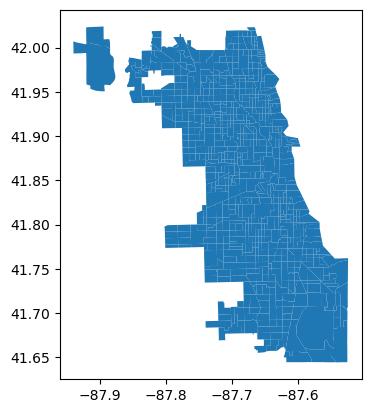

In [22]:
# Plot Census Tracts of Chicago
census.plot()

In [23]:
census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp10   801 non-null    object  
 1   name10      801 non-null    object  
 2   commarea_n  801 non-null    object  
 3   namelsad10  801 non-null    object  
 4   commarea    801 non-null    object  
 5   geoid10     801 non-null    object  
 6   notes       801 non-null    object  
 7   tractce10   801 non-null    object  
 8   countyfp10  801 non-null    object  
 9   geometry    801 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 62.7+ KB


#### New Dataframe for Census Analysis

In [24]:
census_analysis = census[['geoid10','geometry']]
census_analysis = census_analysis.rename(columns={'geoid10':'start_census'})
census_analysis['start_census'] = census_analysis['start_census'].astype('int64')
census_analysis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   start_census  801 non-null    int64   
 1   geometry      801 non-null    geometry
dtypes: geometry(1), int64(1)
memory usage: 12.6 KB


In [25]:
# Merge the taxi trips data with the census tract boundaries based on spatial intersection
#taxi_trips_tracts = gpd.sjoin(taxi_trips, census[['geoid10','geometry']], how = 'left', op='within')

In [26]:
#taxi_trips_tracts.count()

In [27]:
#taxi_trips_tracts.head()

In [28]:
#trips_starts_geo.plot(column='count', cmap='Reds')

#### New Dataframe for Hexagon Analysis

In [29]:
import json
city_bounding_box = gpd.read_file('extra_dataframes/Boundaries - City.geojson')
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)
city_bounding_box_poly = city_bounding_box_json["features"][0]

In [30]:
#city_bounding_box_poly

<Axes: >

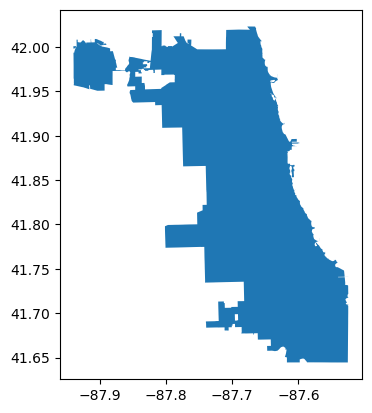

In [31]:
city_bounding_box.plot()

In [32]:
# Computing hexagons for a chicago
H3_HEXAGON_RESOLUTION = 6
polygon_obj = city_bounding_box_poly["geometry"]
#hexagons = []
#for index, row in polygon_obj['coordinates'].iterrows():
 # hexagons.extend(h3.polyfill(row['geometry'].__geo_interface__, h3resolution, geo_json_conformant=True))
#hexagons = h3.polyfill(polygon_obj, res = H3_HEXAGON_RESOLUTION, geo_json_conformant = True)

### Start Time Variation

In [33]:
# Convert the 'start_time' column to Unix timestamps
# taxi_trips_tracts['start_time'] = (taxi_trips_tracts['start_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta(seconds=1)

In [34]:
# Calculate the average start time for each census tract
#tract_avg_start_time = taxi_trips_tracts.groupby('geoid10')['start_time'].mean()
#tract_avg_start_time.info()

In [35]:
# Merge the average start time data with the census tract boundaries
#census_avg_start_time = census.merge(tract_avg_start_time, left_on='geoid10', right_index=True)

In [36]:
#import matplotlib.dates as mdates

# Create the plot
#fig, ax = plt.subplots(figsize=(10, 10))
#census_avg_start_time.plot(column='start_time', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Format the legend to display datetime values
#legend = ax.get_legend()
#if legend:
#    date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
#    legend.set_title('Average Start Time')
#    legend.set_bbox_to_anchor((1.2, 1))
#    legend.set_frame_on(False)
#    legend.set_yticklabels([date_format(x) for x in legend.get_yticks()])
#
#ax.set_title('Average Start Time by Census Tract')
#plt.show()

### Trip Length Variation

#### Per Census Tract

In [37]:
# Take mean of trip distance for each census tract
trip_length = taxi_trips.groupby('start_census')['trip_miles'].mean()
trip_length = pd.DataFrame(trip_length) 

# Make index to column
trip_length = trip_length.reset_index()

trip_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   start_census  554 non-null    float64
 1   trip_miles    554 non-null    float64
dtypes: float64(2)
memory usage: 8.8 KB


In [38]:
# Merge census data with dataframe containing the calculated mean distance for each census 
# (to get the surface for each tract even if there is no trip length data for it)
a =census_analysis.merge(trip_length, how = 'left', on='start_census')

census_analysis['trip_length'] = a['trip_miles']
census_analysis.head(3)

,start_census,geometry,trip_length
0,17031842400,"MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ...",0.818750
1,17031840300,"MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ...",0.472977
2,17031841100,"MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ...",2.797059


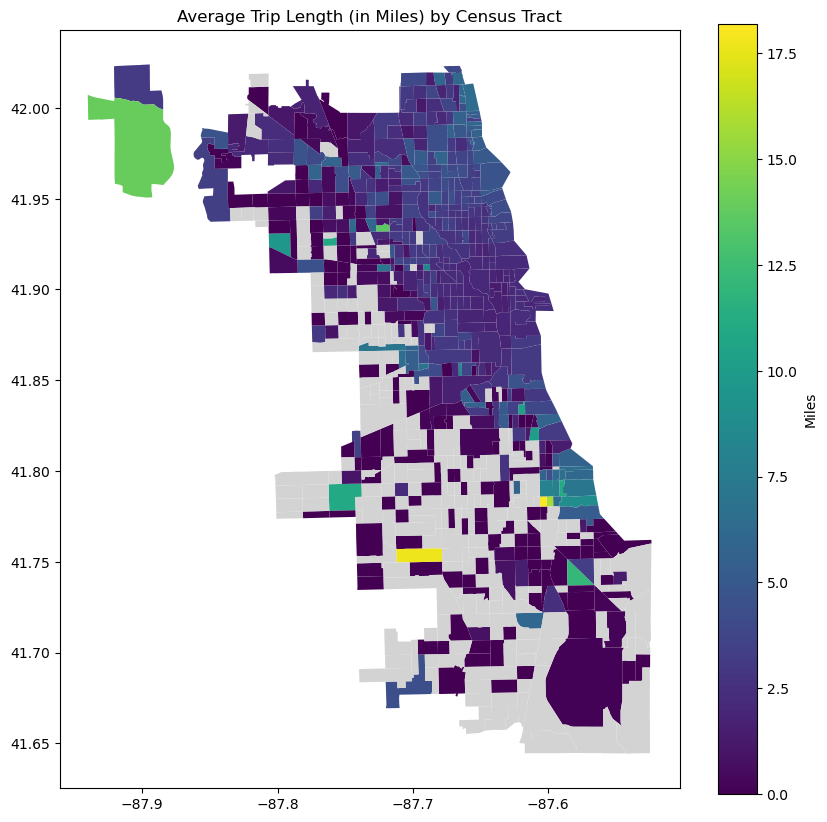

In [39]:
# Plot average trip length (in miles) for each start census tract
fig, ax = plt.subplots(figsize=(10, 10))
census_analysis.plot(column='trip_length', cmap='viridis', linewidth=0.8, ax=ax, legend=True, legend_kwds={'label': "Miles"}, missing_kwds={'color': 'lightgrey'})
ax.set_title('Average Trip Length (in Miles) by Census Tract')
plt.show()

#### Per Hexagon

In [40]:
#trips_starts = pd.DataFrame()
#trips_starts = df.groupby('h3_hex_id_start').mean()['trip_miles'].reset_index().rename(columns={'trip_miles': 'mean_trip_miles'})
#trips_starts['geometry'] = trips_starts.apply(lambda x: Polygon(h3.h3_to_geo_boundary(x["h3_hex_id_start"], geo_json=True)), axis=1)

#trips_starts_geo = gpd.GeoDataFrame(trips_starts, geometry=trips_starts['geometry'], crs='EPSG:4326')

In [41]:
#trips_starts.info()

In [42]:
#trips_starts_geo.plot(column='mean_trip_miles', cmap='Reds')

### Start and End Location

In [55]:
# Count how many trips start and end in each census tract
start_census_count = taxi_trips.groupby('start_census')['start_census'].count()
start_census_count = pd.DataFrame(start_census_count)
end_census_count = taxi_trips.groupby('end_census')['end_census'].count()
end_census_count = pd.DataFrame(end_census_count)

# Rename the column to make index to new column (otherwise not possible because of same name)
start_census_count = start_census_count.rename(columns={"start_census": "start_census_counts"})
start_census_count = start_census_count.reset_index()
end_census_count = end_census_count.rename(columns={"end_census": "end_census_counts"})
end_census_count = end_census_count.reset_index()
end_census_count = end_census_count.rename(columns={"end_census": "start_census"})

start_census_count.info()
end_census_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_census         554 non-null    float64
 1   start_census_counts  554 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_census       653 non-null    float64
 1   end_census_counts  653 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 10.3 KB


In [57]:
# Merge census data with dataframe containing the number of trips for each census 
# (to get the surface for each tract even if there is no trip length data for it)
a =census_analysis.merge(start_census_count, how = 'left', on='start_census')
a.info()
b =census_analysis.merge(end_census_count, how = 'left', on='start_census')
b.info()

census_analysis['start_census_counts'] = a['start_census_counts_y']
census_analysis['end_census_counts'] = b['end_census_counts']

census_analysis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   start_census           801 non-null    int64   
 1   geometry               801 non-null    geometry
 2   trip_length            553 non-null    float64 
 3   start_census_counts_x  553 non-null    float64 
 4   start_census_counts_y  553 non-null    float64 
dtypes: float64(3), geometry(1), int64(1)
memory usage: 37.5 KB
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   start_census         801 non-null    int64   
 1   geometry             801 non-null    geometry
 2   trip_length          553 non-null    float64 
 3   start_census_counts  553 non-null    float64 
 4   end_census_counts    652 non-n

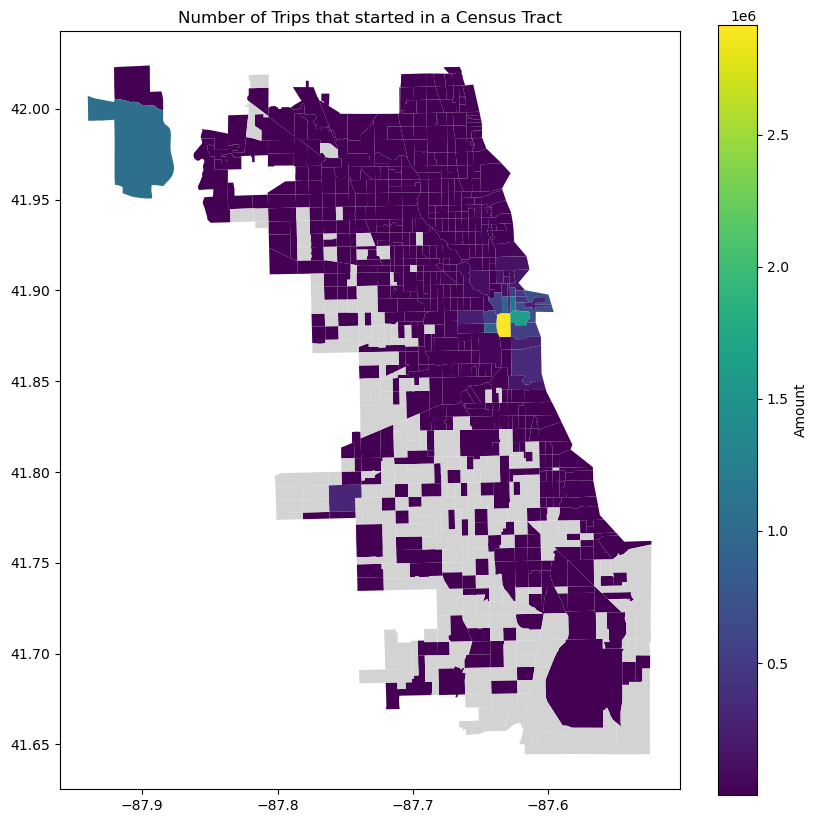

In [49]:
# Plot number of started trips for each census tract
fig, ax = plt.subplots(figsize=(10, 10))
census_analysis.plot(column='start_census_counts', cmap='viridis', linewidth=0.8, ax=ax, legend=True, legend_kwds={'label': "Amount"}, missing_kwds={'color': 'lightgrey'})
ax.set_title('Number of Trips that started in a Census Tract')
plt.show()

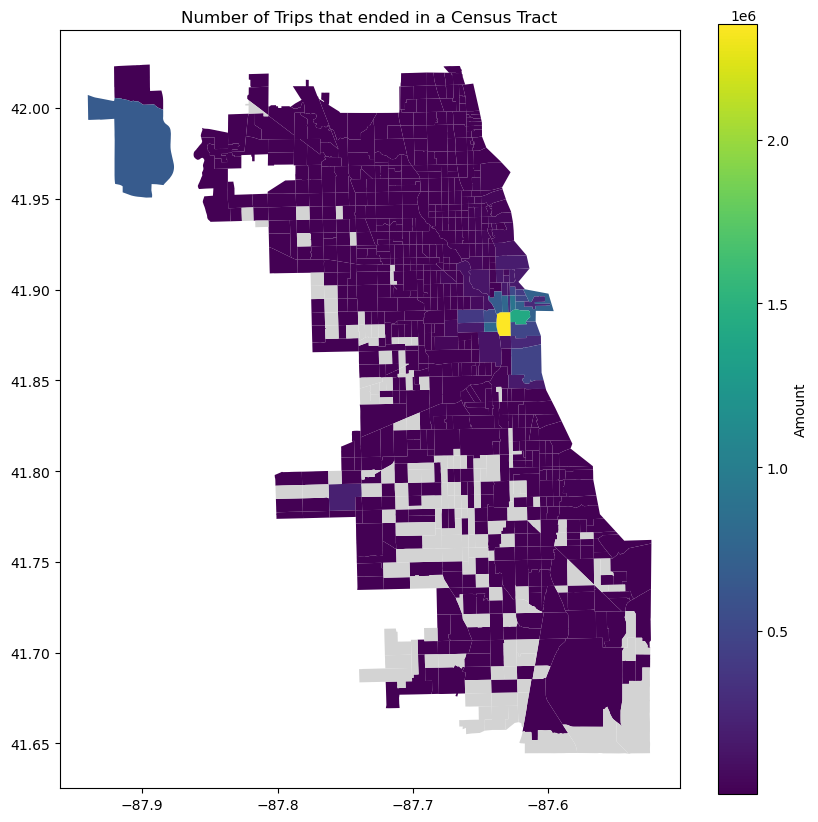

In [58]:
# Plot number of ending trips for each census tract
fig, ax = plt.subplots(figsize=(10, 10))
census_analysis.plot(column='end_census_counts', cmap='viridis', linewidth=0.8, ax=ax, legend=True, legend_kwds={'label': "Amount"}, missing_kwds={'color': 'lightgrey'})
ax.set_title('Number of Trips that ended in a Census Tract')
plt.show()